In [ ]:
#  [구현2: 행정구역별 공공의료 기간 수 및 인구수 대비 공공의료기반 비율 지도 시각화]
# 참고 파일 : test2.ipynb
#  1) 공공의료기관 현황 데이터에서 주소를 추출하고 주소에서 시도, 군구를 추출한다.
#  2) 전체 데이터 1차, 2차 데이터를 추출한다.
#  3) 각 지역별 의료기관 수를 구한다.
#  4) 행정구역의 시도, 군구별 인구수를 추출한다.
#  5. 각 지역별 인구 비율 공공의로기관수 비율을 구한다.
#  6. 위의 데이터를 사용하여 블록 map을 작성한다.

In [30]:
from operator import index

import pandas as pd
from scipy.cluster.hierarchy import weighted

pd.set_option("mode.chained_assignment",None)
import numpy as np

data = pd.read_csv("공공보건의료기관현황.csv", index_col=0, encoding="utf-8", engine="python")
data

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,청풍호노인사랑병원,시군구립,제천시 노인전문병원 설치및 운영에 관한 조례,충청북도,해당없음,33280576,요양병원,187,27207,충청북도 제천시 금성면 청풍호로 1147,www.cplove.co.kr,043-646-0808,043-648-5827,NaN
217,충주시 노인전문병원,시군구립,충주시노인전문병원설치 및 운영에관한 조례,충청북도,해당없음,33280088,요양병원,300,27442,충청북도 충주시 동량면 대전리 1686-28,www.hyolife.com,043-855-9393,043-855-8866,NaN
218,충청북도 충주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,충청북도,해당없음,33100063,종합병원,292,27468,충청북도 충주시 안림로 239-50(안림동 134),www.cjmct.or.kr,043-871-0114,043-843-4231,NaN


In [31]:
addr =pd.DataFrame(data["주소"].apply(lambda v : v.split()[:2]).tolist(), columns=["시도","군구"])
addr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [32]:
print(len(addr["시도"].unique()))
addr["시도"].unique()

29


array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [33]:
addr[addr["시도"] == "용인시"]

addr.iloc[27] = ["경상남도", "창원시"]
addr.iloc[27]

addr.iloc[31] = ["경상남도", "창원시"]
addr.iloc[31]

addr[addr["시도"] == "경산시"]
addr.iloc[47] = ["경상북도", "경산시"]
addr.iloc[47]

addr[addr["시도"] == "천안시"]

addr.iloc[209] = ["충청남도", "천안시"]
addr.iloc[210] = ["충청남도", "천안시"]

addr["시도"].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [34]:
addr_alias = {
  "경기" : "경기도",
  "경남" : "경상남도" ,
  "경북" : "경상북도",
  "충북" : "충청북도" ,
  "충남" : "충청남도",
  "전북" : "전북특별자치도" ,
  "전라북도" : "전북특별자치도" ,
  "전남" : "전남특별자치도",
  "전라남도" : "전남특별자치도",
  "서울시" : "서울특별시",
  "대전시" : "대전광역시",
  "부산특별시" : "부산광역시",
  "강원도" : "강원특별자치도" ,
}

addr["시도"] = addr["시도"].apply(lambda v: addr_alias.get(v,v))
print(len(addr["시도"].unique()))
addr["시도"].unique()

16


array(['강원특별자치도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전남특별자치도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전북특별자치도', '충청북도', '서울특별시',
       '충청남도', '울산광역시'], dtype=object)

In [35]:
addr["군구"].unique()
addr[addr["군구"] == "아란13길"]
addr.iloc[75] = ["제주특별자치도","제주시"]
addr["군구"].unique()
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [36]:
print(len(addr["군구"].unique()))
addr["군구"].unique()

132


array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

In [37]:
addr["시도군구"] = addr.apply(lambda r: r["시도"]+" "+r["군구"], axis=1)
print(len(addr["시도군구"]))
print(len(addr["시도군구"].unique()))
addr

227
140


,시도,군구,시도군구
0,강원특별자치도,춘천시,강원특별자치도 춘천시
1,강원특별자치도,삼척시,강원특별자치도 삼척시
2,강원특별자치도,영월군,강원특별자치도 영월군
3,강원특별자치도,원주시,강원특별자치도 원주시
4,강원특별자치도,강릉시,강원특별자치도 강릉시
...,...,...,...
222,충청북도,제천시,충청북도 제천시
223,충청북도,충주시,충청북도 충주시
224,충청북도,충주시,충청북도 충주시
225,충청북도,영동군,충청북도 영동군


In [38]:
addr["count"] = 0
addr.head()

,시도,군구,시도군구,count
0,강원특별자치도,춘천시,강원특별자치도 춘천시,0
1,강원특별자치도,삼척시,강원특별자치도 삼척시,0
2,강원특별자치도,영월군,강원특별자치도 영월군,0
3,강원특별자치도,원주시,강원특별자치도 원주시,0
4,강원특별자치도,강릉시,강원특별자치도 강릉시,0


In [39]:
addr_group = pd.DataFrame(addr.groupby(["시도", "군구","시도군구"], as_index=False).count())
addr_group.head()

,시도,군구,시도군구,count
0,강원특별자치도,강릉시,강원특별자치도 강릉시,4
1,강원특별자치도,동해시,강원특별자치도 동해시,1
2,강원특별자치도,삼척시,강원특별자치도 삼척시,1
3,강원특별자치도,속초시,강원특별자치도 속초시,1
4,강원특별자치도,양구군,강원특별자치도 양구군,1


In [40]:
addr_group = addr_group.set_index("시도군구")
addr_group.to_csv("./addr_group.csv", encoding="utf-8", index=False)
addr_group

,시도,군구,count
시도군구,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 양구군,강원특별자치도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


In [41]:
population = pd.read_excel("./행정구역_시군구_별__성별_인구수2.xlsx")
population

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,합계,51207874,25492996,25714878
1,서울특별시,소계,9330658,4504432,4826226
2,서울특별시,종로구,138208,66514,71694
3,서울특별시,중구,120325,57948,62377
4,서울특별시,용산구,203727,97392,106335
...,...,...,...,...,...
288,경상남도,거창군,59514,29241,30273
289,경상남도,합천군,40133,19738,20395
290,제주특별자치도,소계,669460,334794,334666
291,제주특별자치도,제주시,487623,243336,244287


In [42]:
population = population.rename(columns={"행정구역(시군구)별(1)" : "시도","행정구역(시군구)별(2)" : "군구"})
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,합계,51207874,25492996,25714878
1,서울특별시,소계,9330658,4504432,4826226
2,서울특별시,종로구,138208,66514,71694
3,서울특별시,중구,120325,57948,62377
4,서울특별시,용산구,203727,97392,106335


In [43]:
for element in range (0, len(population)):
  population["군구"][element] = population["군구"][element].strip()

population["시도군구"] = population.apply(lambda r: r["시도"] + " " + r["군구"], axis=1)

population.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_11876\1293321673.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  population["군구"][element] = population["군구"][element].strip()
C:\Users\admin\AppData\Local\Temp\ipykernel_11876\1293321673.py:2:

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,합계,51207874,25492996,25714878,전국 합계
1,서울특별시,소계,9330658,4504432,4826226,서울특별시 소계
2,서울특별시,종로구,138208,66514,71694,서울특별시 종로구
3,서울특별시,중구,120325,57948,62377,서울특별시 중구
4,서울특별시,용산구,203727,97392,106335,서울특별시 용산구


In [44]:
population = population[population.군구 != "소계"]
population = population[population.군구 != "합계"]
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
2,서울특별시,종로구,138208,66514,71694,서울특별시 종로구
3,서울특별시,중구,120325,57948,62377,서울특별시 중구
4,서울특별시,용산구,203727,97392,106335,서울특별시 용산구
5,서울특별시,성동구,273549,132354,141195,서울특별시 성동구
6,서울특별시,광진구,331589,158992,172597,서울특별시 광진구


In [45]:
population = population.set_index("시도군구")
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,138208,66514,71694
서울특별시 중구,서울특별시,중구,120325,57948,62377
서울특별시 용산구,서울특별시,용산구,203727,97392,106335
서울특별시 성동구,서울특별시,성동구,273549,132354,141195
서울특별시 광진구,서울특별시,광진구,331589,158992,172597


In [46]:
addr_population_merge = pd.merge(addr_group, population, how="inner", left_index=True, right_index=True)
print(addr_population_merge.shape)
addr_population_merge.to_csv('./addr_population_merge.csv',encoding='utf-8')
addr_population_merge.head()

(138, 8)


,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,강원특별자치도,강릉시,207543,102789,104754
강원특별자치도 동해시,강원특별자치도,동해시,1,강원특별자치도,동해시,87571,44439,43132
강원특별자치도 삼척시,강원특별자치도,삼척시,1,강원특별자치도,삼척시,61464,31279,30185
강원특별자치도 속초시,강원특별자치도,속초시,1,강원특별자치도,속초시,80754,39851,40903
강원특별자치도 양구군,강원특별자치도,양구군,1,강원특별자치도,양구군,20552,10749,9803


In [47]:
local_Hospital_Population = addr_population_merge[["시도_x", "군구_x", "count", "총인구수 (명)"]]
local_Hospital_Population.head()

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,207543
강원특별자치도 동해시,강원특별자치도,동해시,1,87571
강원특별자치도 삼척시,강원특별자치도,삼척시,1,61464
강원특별자치도 속초시,강원특별자치도,속초시,1,80754
강원특별자치도 양구군,강원특별자치도,양구군,1,20552


In [48]:
local_Hospital_Population = local_Hospital_Population.rename(columns= {"시도_x": "시도","군구_x" :"군구", "총인구수 (명)" : "인구수"})
local_Hospital_Population

,시도,군구,count,인구수
시도군구,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,207543
강원특별자치도 동해시,강원특별자치도,동해시,1,87571
강원특별자치도 삼척시,강원특별자치도,삼척시,1,61464
강원특별자치도 속초시,강원특별자치도,속초시,1,80754
강원특별자치도 양구군,강원특별자치도,양구군,1,20552
...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27293
충청북도 영동군,충청북도,영동군,1,43504
충청북도 제천시,충청북도,제천시,1,128352


In [49]:
HS_count = local_Hospital_Population["count"]
local_Hospital_Population["HS_ratio"] = HS_count.div(local_Hospital_Population["인구수"], axis=0)*100000
local_Hospital_Population

,시도,군구,count,인구수,HS_ratio
시도군구,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,207543,1.927311
강원특별자치도 동해시,강원특별자치도,동해시,1,87571,1.141931
강원특별자치도 삼척시,강원특별자치도,삼척시,1,61464,1.626969
강원특별자치도 속초시,강원특별자치도,속초시,1,80754,1.238329
강원특별자치도 양구군,강원특별자치도,양구군,1,20552,4.865707
...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27293,3.663943
충청북도 영동군,충청북도,영동군,1,43504,2.298639
충청북도 제천시,충청북도,제천시,1,128352,0.779107


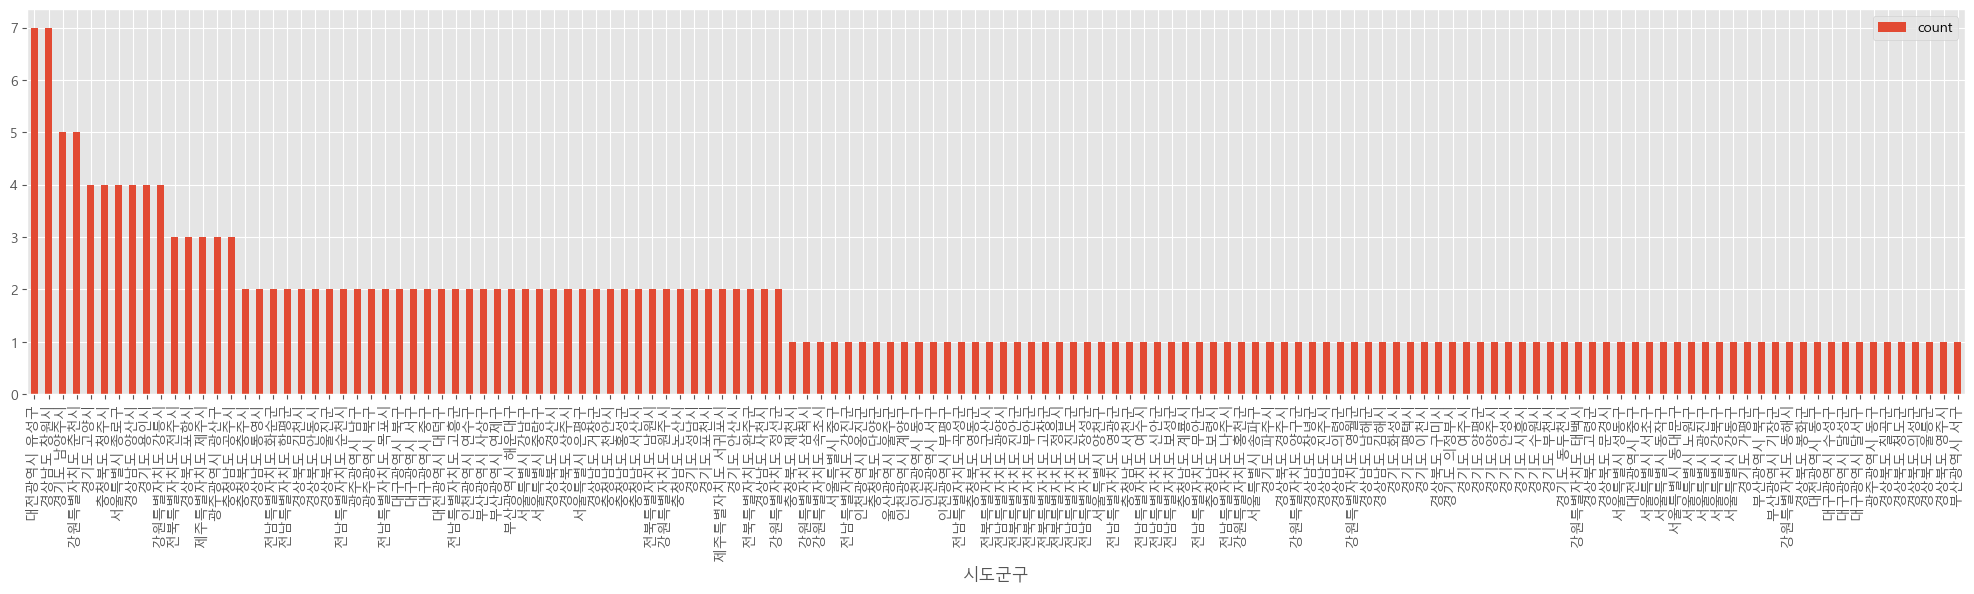

In [50]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style

style.use("ggplot")

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgunbd.ttf").get_name()
rc("font", family = font_name)

HS_ratio = local_Hospital_Population[["count"]]
HS_ratio = HS_ratio.sort_values("count", ascending=False)
plt.rcParams["figure.figsize"] = (25,5)
HS_ratio.plot(kind = "bar", rot = 90)
plt.show()


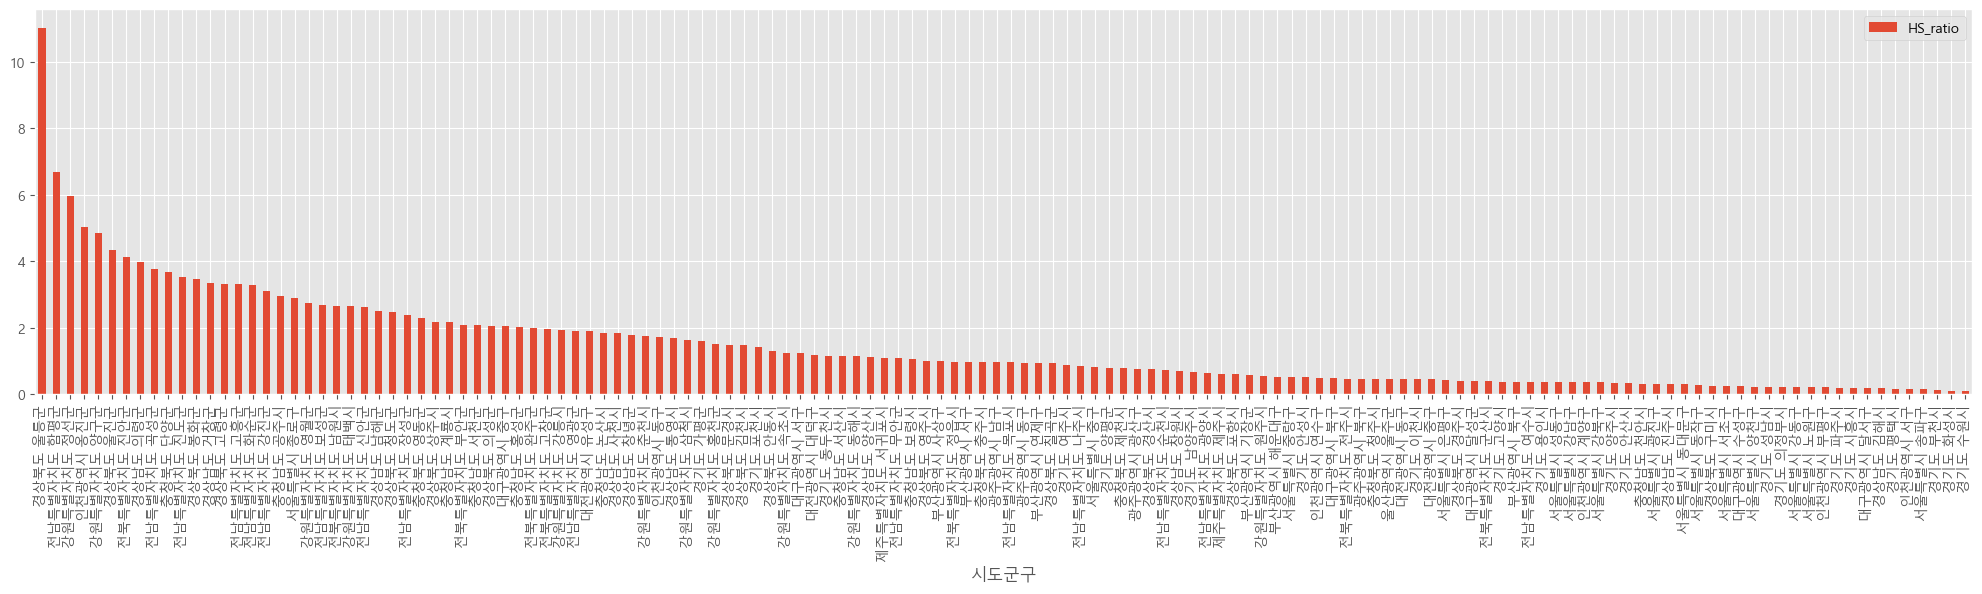

In [51]:
HS_ratio = local_Hospital_Population[["HS_ratio"]]
HS_ratio = HS_ratio.sort_values("HS_ratio", ascending=False)
HS_ratio.plot(kind = "bar", rot = 90)
plt.show()

In [52]:
import os
path = os.getcwd()
path

'D:\\BigData_Visualiza_Practice\\BigData 분석 & 시각화_1009_홍상우'

In [53]:
data_draw_korea = pd.read_csv(path+"\\data_draw_korea.csv", index_col=0, encoding="utf-8", engine="python")
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [54]:
addr_aliases = {'강원도': '강원특별자치도', '전라북도': '전북특별자치도', '전라남도': '전남특별자치도'}
data_draw_korea["광역시도"] = data_draw_korea["광역시도"].apply(lambda r: addr_aliases.get(r,r))
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
1,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
2,86747,동해,11,5,180.01,강원특별자치도,동해시
3,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
4,76733,속초,9,1,105.25,강원특별자치도,속초시


In [55]:
data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r: r['광역시도'] +' '+r['행정구역'], axis=1)
data_draw_korea = data_draw_korea.set_index("시도군구")
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시
...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군


In [56]:
data_draw_korea_local_Hospital_Population = pd.merge(data_draw_korea, local_Hospital_Population, how="outer", left_index=True, right_index=True)
data_draw_korea_local_Hospital_Population

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,HS_ratio
시도군구,,,,,,,,,,,,
강원특별자치도 강릉시,202520,강릉,11,4,1040.07,강원특별자치도,강릉시,강원특별자치도,강릉시,4.0,207543.0,1.927311
강원특별자치도 고성군,25589,고성(강원),9,0,664.19,강원특별자치도,고성군,NaN,NaN,NaN,NaN,NaN
강원특별자치도 동해시,86747,동해,11,5,180.01,강원특별자치도,동해시,강원특별자치도,동해시,1.0,87571.0,1.141931
강원특별자치도 삼척시,63986,삼척,11,8,1185.80,강원특별자치도,삼척시,강원특별자치도,삼척시,1.0,61464.0,1.626969
강원특별자치도 속초시,76733,속초,9,1,105.25,강원특별자치도,속초시,강원특별자치도,속초시,1.0,80754.0,1.238329
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시,충청북도,제천시,1.0,128352.0,0.779107
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군,NaN,NaN,NaN,NaN,NaN
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군,NaN,NaN,NaN,NaN,NaN


In [57]:
min(data_draw_korea_local_Hospital_Population["count"])

1.0

In [58]:
max(data_draw_korea_local_Hospital_Population["count"])

7.0

In [59]:
data_draw_korea_local_Hospital_Population["count"].unique()

array([ 4., nan,  1.,  2.,  5.,  7.,  3.])

In [60]:
data_draw_korea_local_Hospital_Population["HS_ratio"].unique()

array([ 1.92731145,         nan,  1.14193055,  1.62696863,  1.23832875,
        4.8657065 ,  2.7320165 ,  0.55224363,  5.97246693,  1.74908348,
        2.64026403,  1.50012751,  1.60071712,  0.37413563,  0.68288193,
        1.15198083,  0.13002481,  0.21912813,  0.0838746 ,  0.19323261,
        0.32290303,  0.51544532,  0.34539093,  0.78869329,  0.87288979,
        0.36793654,  0.21685294,  0.44959986,  0.19469381,  0.16690646,
        1.41398716,  0.10289813,  3.36055382,  0.188082  ,  2.51698968,
        1.8446781 ,  1.11135808,  3.98501634,  0.29546549,  1.78443969,
        0.70042095,  1.69133192,  0.75184296,  0.40884913,  3.328784  ,
        0.24728298,  1.47481749,  1.4919806 ,  3.48201539,  2.17902902,
        1.30802736,  1.01233018, 11.03387399,  4.33783022,  2.05676676,
        2.4664562 ,  0.9333408 ,  0.61045216,  0.76693782,  0.96151997,
        0.9441979 ,  0.47236321,  0.19169096,  0.38839627,  0.48502839,
        1.22838805,  0.24409533,  2.03848663,  1.19200167,  0.45

In [61]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)],
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)],
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)],
    [(9, 12), (9, 10), (8, 10)],
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)],
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)],
    [(14, 4), (15, 4), (15, 6)],
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)],
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)],
    [(15, 11), (16, 11), (16, 13)],
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)],
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)],
    [(18, 5), (20, 5), (20, 6)],
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)],
]

In [62]:
def draw_blockMap(blockedMap, targetData, title, color):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
    print(f"whitelabelmin 전: {whitelabelmin}")
    print(f"whitelabelmin 후: {whitelabelmin}")

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    print(f"vmin 전: {vmin}")
    print(f"vmin 후: {vmin}")

    vmax = max(blockedMap[targetData])
    print(f"vmax 전: {vmax}")
    print(f"vmax 후: {vmax}")

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    print(f"mapData: {mapdata}")

    masked_mapData = np.ma.masked_where(np.isnan(mapdata), mapdata)
    print(f"masked_mapData: {masked_mapData}")

    plt.figure(figsize = (8,13))
    plt.title(title)

    plt.pcolor(masked_mapData, vmin = vmin, vmax = vmax, cmap = color, edgecolor = '#aaaaaa', linewidth = 0.5)

    for idx, row in blockedMap.iterrows():
        annocolr = "white" if row[targetData] > whitelabelmin else "black"

        if row["광역시도"].endswith("시") and not row["광역시도"].startswith("세종"):
            dispname = "{}\n{}".format(row["광역시도"][:2],row["행정구역"][:-1])
            if len(row["행정구역"]) <= 2:
                dispname += row["행정구역"][-1]
        else:
            dispname = row["행정구역"][:-1]

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row["x"]+0.5, row["y"]+0.5), weight = "bold",fontsize=fontsize, ha="center", va="center", color = annocolr, linespacing=linespacing)

    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c = "black", lw = 4)
    plt.gca().invert_yaxis()
    plt.axis("off")

    cb = plt.colorbar(shrink = 1, aspect = 10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.savefig("./blockMap_"+ targetData + ".png")
    plt.show

whitelabelmin 전: 2.5
whitelabelmin 후: 2.5
vmin 전: 1.0
vmin 후: 1.0
vmax 전: 7.0
vmax 후: 7.0
mapData: x    0    1    2    3    4    5    6    7    8    9    10   11   12   13
y                                                                       
0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN
1   NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  2.0  1.0  NaN  NaN  NaN  NaN
2   NaN  NaN  NaN  1.0  4.0  1.0  NaN  1.0  1.0  NaN  NaN  NaN  NaN  NaN
3   NaN  NaN  NaN  NaN  2.0  NaN  4.0  1.0  5.0  1.0  5.0  NaN  NaN  NaN
4   NaN  1.0  1.0  NaN  NaN  NaN  1.0  1.0  2.0  NaN  1.0  4.0  NaN  NaN
5   NaN  1.0  1.0  1.0  1.0  1.0  NaN  1.0  1.0  NaN  NaN  1.0  NaN  NaN
6   NaN  NaN  1.0  2.0  NaN  NaN  1.0  1.0  1.0  1.0  NaN  2.0  NaN  1.0
7   NaN  NaN  NaN  1.0  NaN  NaN  2.0  NaN  NaN  1.0  2.0  1.0  NaN  NaN
8   1.0  2.0  NaN  NaN  1.0  NaN  NaN  2.0  1.0  1.0  1.0  1.0  NaN  NaN
9   NaN  NaN  NaN  NaN  2.0  1.0  1.0  4.0  2.0  NaN  1.0  1.0  2.0  NaN
10  NaN  2.0  2.0  NaN  3

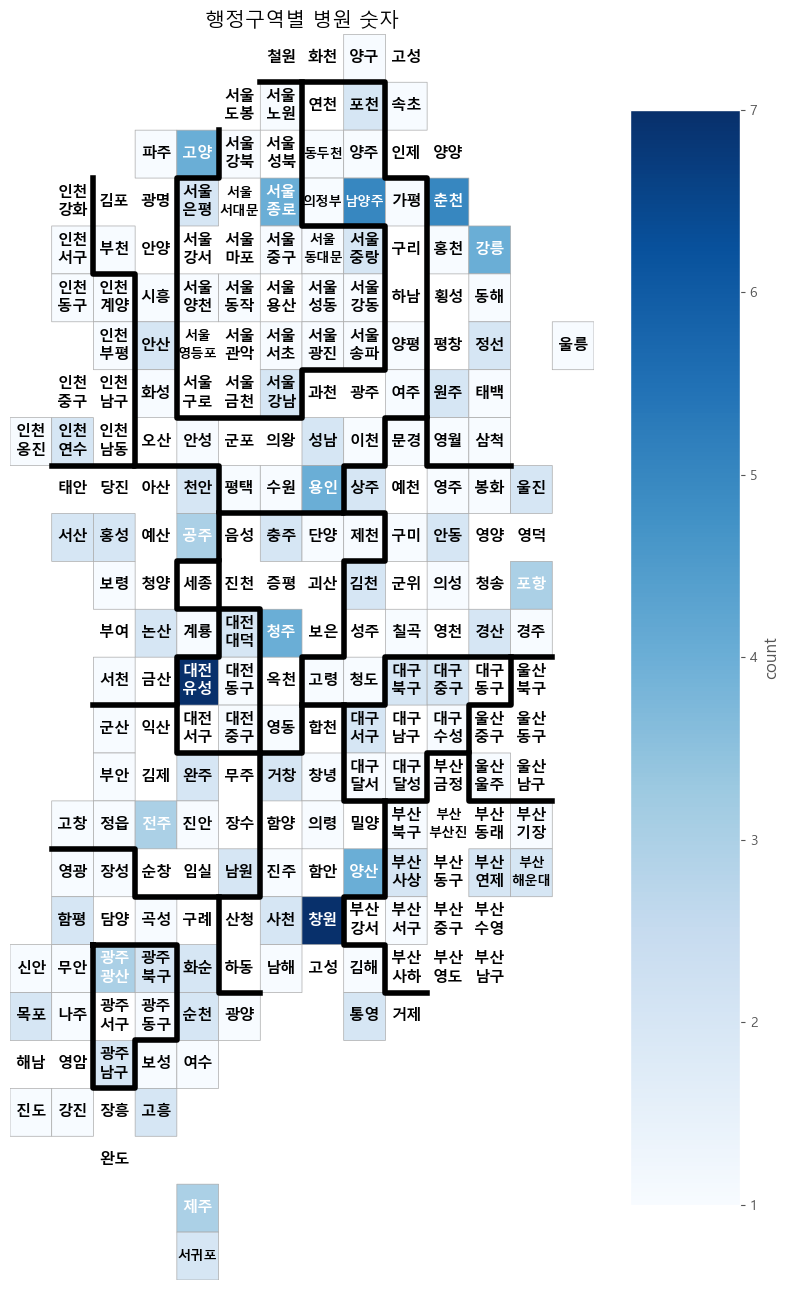

In [35]:
draw_blockMap(data_draw_korea_local_Hospital_Population, "count", "행정구역별 병원 숫자", "Blues")

whitelabelmin 전: 2.8213744513736514
whitelabelmin 후: 2.8213744513736514
vmin 전: 0.08387460411186859
vmin 후: 0.08387460411186859
vmax 전: 11.033873993158998
vmax 후: 11.033873993158998
mapData: x         0         1         2         3         4         5         6   \
y                                                                          
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN       NaN       NaN       NaN  0.203954   
2        NaN       NaN       NaN  0.194694  0.374136  0.352991       NaN   
3        NaN       NaN       NaN       NaN  0.434086       NaN  2.894188   
4        NaN  0.157343  0.130025       NaN       NaN       NaN  0.831082   
5        NaN  1.719336  0.357545  0.193233  0.232224  0.266343       NaN   
6        NaN       NaN  0.202489  0.322903       NaN       NaN  0.244904   
7        NaN       NaN       NaN  0.102898       NaN       NaN  0.358992   
8   5.024621  0.499424       NaN       NaN  0.515

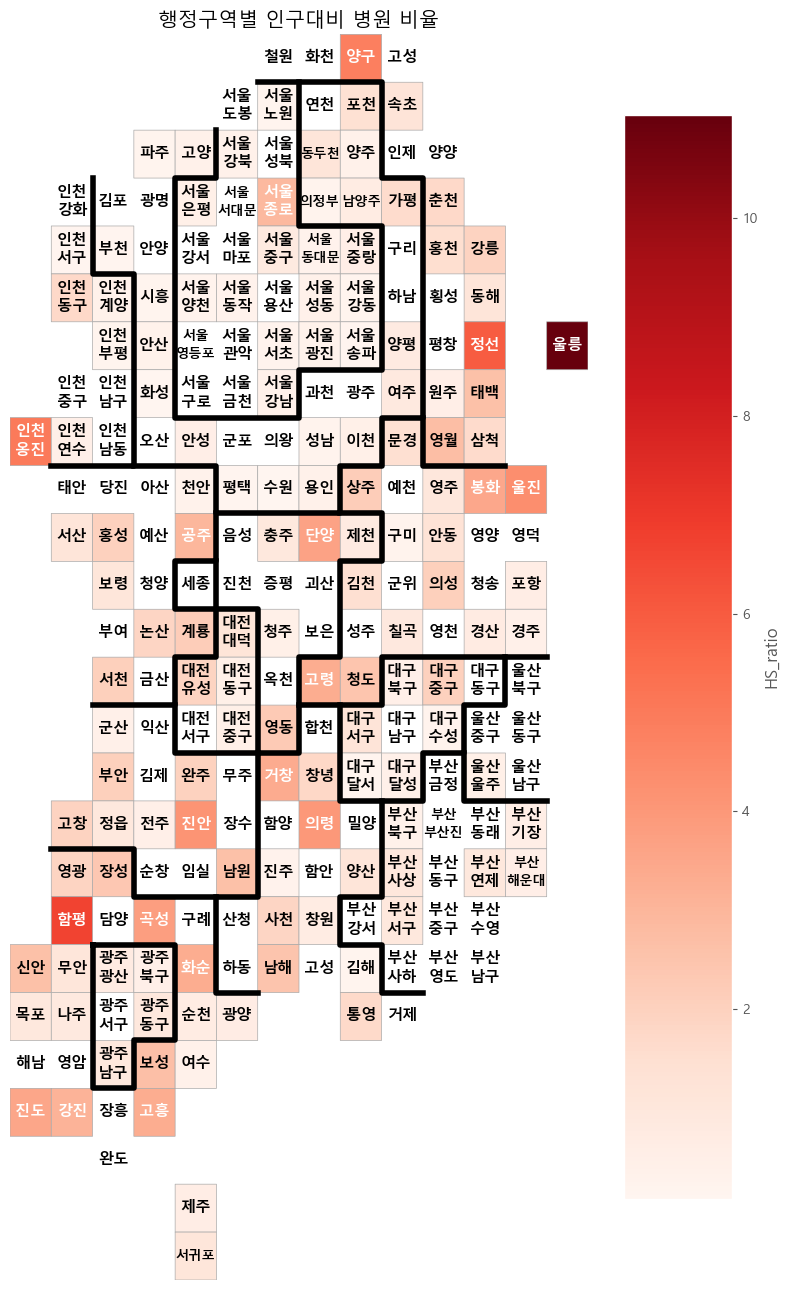

In [63]:
draw_blockMap(data_draw_korea_local_Hospital_Population,"HS_ratio","행정구역별 인구대비 병원 비율", "Reds")